In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pathlib
import os
import sys

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/amazon', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.lrn.csv")
display(datapath_train)
datapath_test = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.tes.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.lrn.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.tes.csv')

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,8,6,10,6,7,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,Chell
1,13,1,13,9,8,8,2,3,2,4,...,4,1,2,1,0,1,0,0,0,Engineer
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,1,0,0,0,0,Grove
3,8,11,10,11,3,7,0,4,2,1,...,0,0,1,0,0,0,2,1,0,Davisson
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,1,0,0,1,0,1,0,0,Riley
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,1,0,0,0,1,Neal
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,1,1,0,4,Messick
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,2,0,0,0,Mitchell


# Data explenarision

It containt of numerical values with no missing values. The column "Class" is dividet into 50 different names.

In [5]:
def PlotHist(df, xaxis,xlabel,ylabel,title,savename,bins):
    plt.rcParams.update({'font.size': 12})
    mpl.style.use('seaborn')
    fig = plt.figure(figsize=(6,5))
    plt.hist(df,bins = bins)
    plt.suptitle(title, fontsize=14, weight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10001 entries, V1 to Class
dtypes: int64(10000), object(1)
memory usage: 57.2+ MB


In [7]:
count_classes = df_train["Class"].value_counts()
count_classes

Chell          21
Hayes          20
Chachra        19
Lovitt         19
Shea           18
Mahlers2nd     18
Agresti        18
Lee            18
Nigam          17
Davisson       17
Peterson       17
Ashbacher      17
Mark           17
Morrison       17
Cholette       17
Neal           16
Robert         16
Auken          16
Riley          16
Harp           16
Calvinnme      16
Merritt        16
Grove          16
McKee          16
Janson         16
Vernon         15
Cutey          15
Comdet         15
Kolln          15
Sherwin        15
Bukowsky       14
Messick        14
Blankenship    14
Corn           14
Koenig         14
Taylor         13
Power          13
Chandler       13
Walters        13
Mitchell       13
Lawyeraau      13
Engineer       12
Dent           12
Goonan         12
Wilson         11
Brody          11
Brown          11
Vision         10
Johnson        10
CFH             8
Name: Class, dtype: int64

15.0


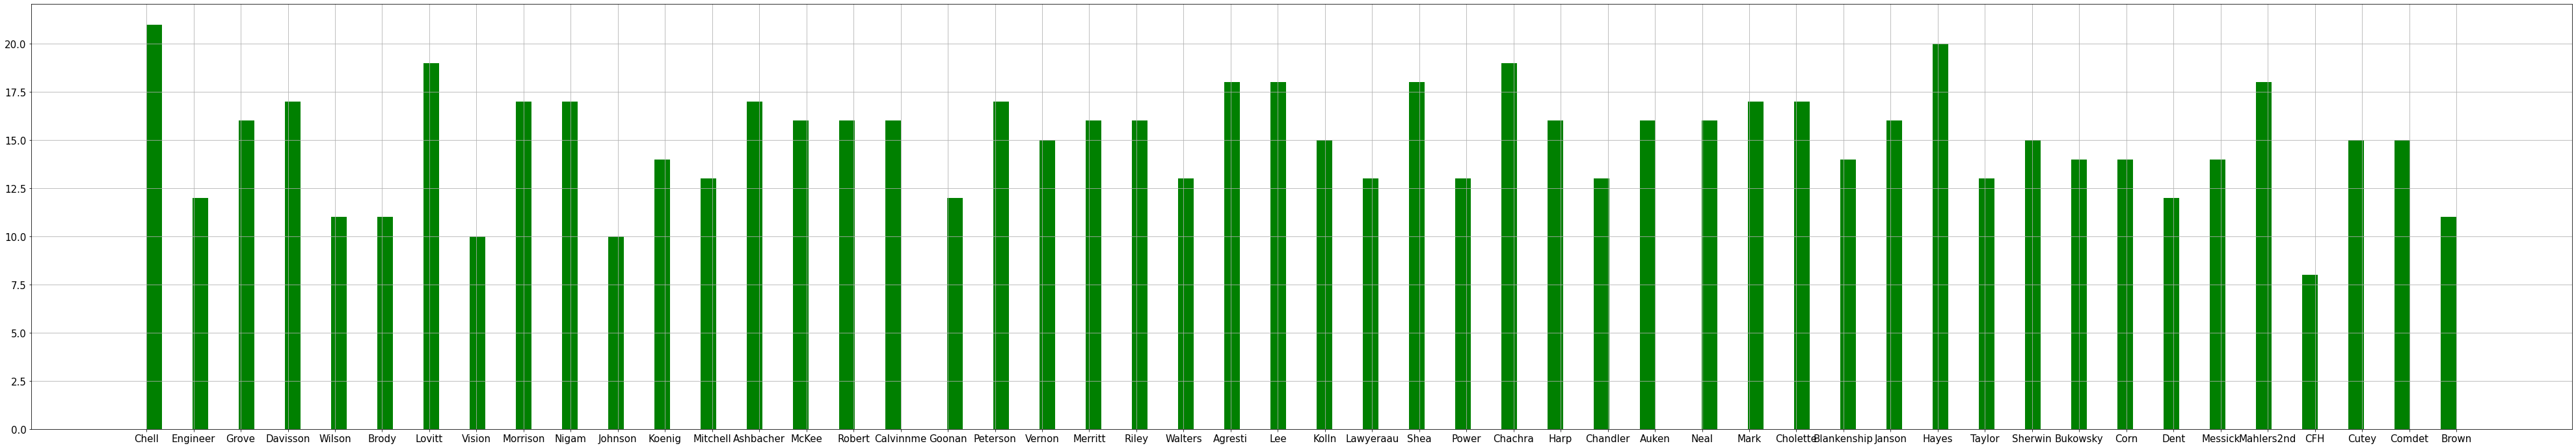

In [8]:
#plt.rcParams.update({'font.size': 12})
#mpl.style.use('seaborn')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
fig = plt.figure(figsize=(70,12))
#sns.histplot(count_classes,kde = False)
plt.hist(df_train.Class,150,facecolor='g')
plt.grid()
plt.savefig("Bilder/Class_distribution")
#ax = sns.barplot(y = 'Class', data = df_train)
print(np.mean(count_classes))

even distribution form the class column. Mean is 15 so there are no outliers.

## k-Best method

In [9]:
feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

In [10]:
k = 3
feature_kb = SelectKBest(chi2, k=k).fit_transform(feature, target)
feature_kb.shape

(750, 3)

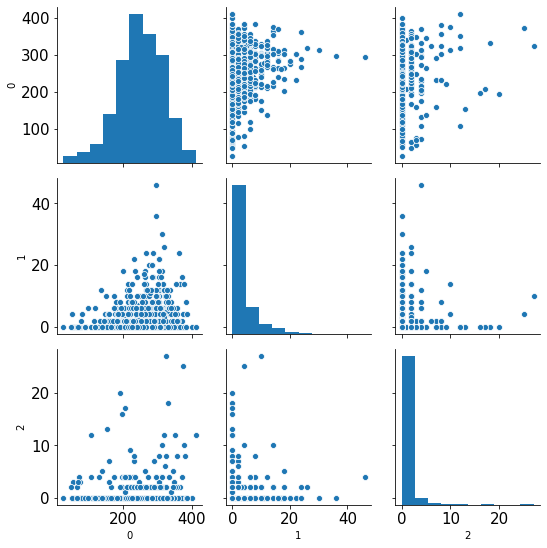

In [11]:
sns.pairplot(pd.DataFrame(feature_kb))

## varianz selection

In [20]:
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
feature_var = sel.fit_transform(feature)
pd.DataFrame(feature_var)

,0,1,2,3,4,5,6,7,8,9,...,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029
0,8,6,10,6,7,2,2,2,3,2,...,0,1,0,0,0,0,0,0,0,0
1,13,1,13,9,8,8,2,3,2,4,...,0,4,1,2,1,0,1,0,0,0
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,0,1,0,0,0,0
3,8,11,10,11,3,7,0,4,2,1,...,2,0,0,1,0,0,0,2,1,0
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,0,1,0,0,1,0,1,0,0
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,0,1,0,0,0,1
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,0,1,1,0,4
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,0,2,0,0,0


In [ ]:
#sns.pairplot(pd.DataFrame(feature_var))

## PCA

In [13]:
pca = PCA(n_components=k)
feature_PCA = pca.fit(feature.values).transform(feature.values)
feature_PCA.shape
pd.DataFrame(feature_PCA)

,0,1,2
0,68.446998,-0.725078,5.023599
1,-36.032553,25.244671,8.440214
2,-39.702054,-0.554687,14.977428
3,-20.902860,-25.622594,-20.651289
4,1.498245,-17.564776,-6.133438
...,...,...,...
745,3.348726,19.549312,-5.611836
746,-78.421096,-7.956790,-31.610522
747,-6.350014,-19.727653,19.568458
748,90.082580,8.849176,1.256578


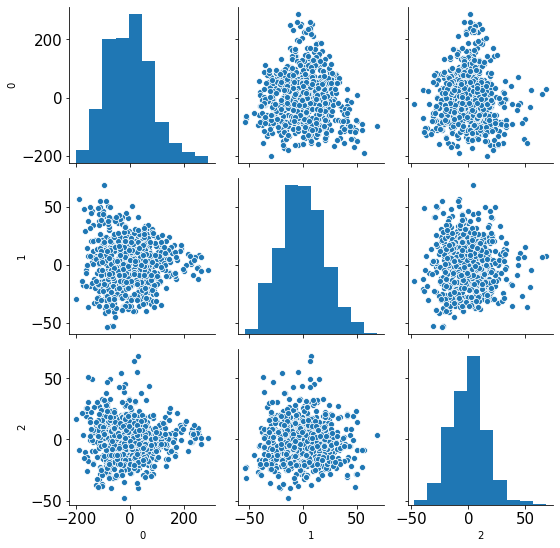

In [14]:
sns.pairplot(pd.DataFrame(feature_PCA))

## function outputs

In [78]:
def FeatureSelection_Varianz(per):
    return VarianceThreshold(threshold=(per * (1 - per)))

def FeatureSelection_kBest(k):
    return SelectKBest(chi2, k=k)

def FeatureSelection_PCA(k):
    return PCA(n_components=k)


In [79]:
def Preprocessing_Amazon(df_train, df_target, feature_method = "kBest", k = 50, per = 0.8, scale_method = "standard"):
    if(feature_method == "varianz"):
        fea = FeatureSelection_Varianz(per) 
        df_train = fea.fit_transform(df_train)
    if(feature_method == "kBest"):
        fea = FeatureSelection_kBest(k)
        df_train = fea.fit_transform(df_train, df_target)
    if(feature_method == "PCA"):
        fea = FeatureSelection_PCA(k)
        df_train = fea.fit(df_train.values).transform(df_train.values)


    if(scale_method == "standard"):
        scl = StandardScaler() 
    if(scale_method == "minmax"):
        scl = MinMaxScaler()
    if(scale_method == "quantil"):
        scl = QuantileTransformer()
    
    scl.fit(df_train)
    df_train = scl.transform(df_train)

    return pd.DataFrame(df_train)

In [81]:
Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = "standard")

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.434196,-0.365710,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.833586,-0.873198,-0.709898,...,-0.289243,-0.467793,-0.403820,-0.410848,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
1,-0.434196,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.878090,-0.913092,-1.063932,...,-0.289243,0.377616,-0.403820,-0.410848,-0.446312,0.556373,-0.289262,-0.286022,-0.281361,7.919212
2,0.067571,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.404322,-0.195001,0.484968,...,-0.289243,-0.467793,1.312129,1.407062,0.436891,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
3,-0.935964,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.251494,0.084256,0.750493,...,-0.289243,-0.467793,-0.403820,-0.410848,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
4,-0.434196,-0.756425,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.084728,-0.394471,0.307951,...,-0.289243,-0.467793,0.454155,0.498107,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2.576410,-0.756425,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.023597,0.602877,0.086679,...,-0.289243,2.068435,-0.403820,-0.410848,-0.446312,2.448797,-0.289262,-0.286022,-0.281361,-0.236516
746,0.820223,-0.756425,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,1.183746,0.164044,0.529222,...,-0.289243,-0.467793,0.454155,0.498107,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
747,-0.935964,-0.365710,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.115294,0.443301,0.529222,...,-0.289243,0.377616,-0.403820,-0.410848,0.436891,-0.389839,-0.289262,-0.286022,-0.281361,0.782950
748,-0.434196,0.806436,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-1.032263,-0.992879,-1.152440,...,-0.289243,0.377616,-0.403820,-0.410848,0.436891,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516


## correlation

In [ ]:
#df_train_corr = df_train.corr()

In [ ]:
#df_train_corr.to_csv("df_train_corr.csv", index=False)

In [21]:
df_train_corr = pd.read_csv("df_train_corr.csv")
df_train_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,1.000000,0.258417,0.207032,0.526616,0.296986,0.277006,-0.026778,0.269789,0.148335,0.125979,...,0.005081,0.057423,0.063297,0.049645,0.082458,-0.012797,0.121677,0.030423,0.069911,-0.014479
1,0.258417,1.000000,0.250979,0.214606,0.163175,0.230601,0.079556,0.270660,0.095397,0.070262,...,-0.029464,-0.020058,0.042876,-0.028500,0.044434,0.025210,0.146365,0.096851,0.209874,0.052501
2,0.207032,0.250979,1.000000,0.254246,0.270863,0.308102,0.132506,0.163894,0.230655,0.224306,...,0.029837,0.000351,0.114335,0.011122,0.001243,0.058435,0.081462,0.055809,0.083674,0.094953
3,0.526616,0.214606,0.254246,1.000000,0.082238,0.177392,-0.130751,0.300996,0.118354,-0.095135,...,0.008548,0.018714,-0.010273,0.063621,0.105199,-0.094551,0.119138,0.053159,0.029551,0.082575
4,0.296986,0.163175,0.270863,0.082238,1.000000,0.200276,0.228212,0.068885,0.222962,0.194341,...,0.071336,0.090206,0.303703,-0.000804,-0.054673,0.112893,0.003542,0.038569,0.053030,0.098803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.012797,0.025210,0.058435,-0.094551,0.112893,-0.005628,0.201779,0.004214,0.090282,0.202423,...,-0.003793,-0.017074,0.101042,0.010674,-0.033443,1.000000,-0.019806,-0.012502,0.022907,-0.014307
9996,0.121677,0.146365,0.081462,0.119138,0.003542,0.049931,0.002420,0.288881,0.052288,-0.041283,...,-0.005473,0.040812,0.003782,0.035324,0.031360,-0.019806,1.000000,0.059121,0.031312,0.020224
9997,0.030423,0.096851,0.055809,0.053159,0.038569,0.009224,0.042852,0.037832,0.066327,0.035565,...,0.011141,-0.010159,0.054447,-0.015869,0.061759,-0.012502,0.059121,1.000000,0.020587,-0.007267
9998,0.069911,0.209874,0.083674,0.029551,0.053030,0.024445,0.043377,0.086025,0.034539,0.040769,...,0.072505,-0.039313,-0.012050,0.122130,0.030601,0.022907,0.031312,0.020587,1.000000,0.068165
